## Predicting oil reserves and optimizing well placement using Machine Learning.
Oil mining company has reservoir data containing oil well parameters for some selective basins/regions. As a data scientist, you've been hired to analyze reservoir data and build a model for predicting reserves in the new wells. You are tasked with optimizing well placement and maximizing profit. An important deliverable for this project is to analyze risks using the bootstrap technique.

#### Objective
Production forecast and reserves estimate are an essential input in the decision-making and investment evaluation scheme for any oil company. Oil companies and reservoir asset managers must factor in the reserves, production forecasts, and estimated ultimate recovery in determining whether a production project will be viable and profitable or not. In addition to reservoir volume, operational risk management is another important metric for oil companies. To this end, we need to find the best well placement and build a model to predict the volume of reserves and maximize profit by picking the region with the highest total profit. The model developed will be useful as a basis for critical decision making during reservoir management and field development planning.

#### Conditions:

- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for oil well development is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.


In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats as st


%matplotlib inline
sns.set()

import pandas_profiling as pp

In [3]:
from category_encoders import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import make_scorer

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score


## Load data

In [4]:

df_region1= pd.read_csv('geo_data_0.csv')
df_region2= pd.read_csv('geo_data_1.csv')
df_region3= pd.read_csv('geo_data_2.csv')

    

In [5]:
df_region1

id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]

In [6]:
df_region2

id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]

In [7]:
df_region3

id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]

## Data Check

In [8]:
 pp.ProfileReport(df_region1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def data_info(df):
    print("Data info")
    print(df.info())
    print()
    print("---"*20)
    print("Number of missing data in each column")
    print(df.isna().sum())
    print()
    print("---"*20)
    print("Number of duplicate rows")
    print(df.duplicated().sum())
    return None

In [10]:
data_info(df_region1)

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

------------------------------------------------------------
Number of missing data in each column
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

------------------------------------------------------------
Number of duplicate rows
0


In [11]:
 pp.ProfileReport(df_region2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
data_info(df_region2)

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

------------------------------------------------------------
Number of missing data in each column
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

------------------------------------------------------------
Number of duplicate rows
0


In [13]:
 pp.ProfileReport(df_region3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
data_info(df_region3)

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

------------------------------------------------------------
Number of missing data in each column
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

------------------------------------------------------------
Number of duplicate rows
0


From the general information about the dataset, we can see that the data does not have any missing values. No duplicate rows. In region 3, f1, f2, and f3 are all normally distributed. We observe significant correlation between f2 and the product reserve in all regions

## Data preparation

In [15]:
#add region to data
df_region1['region']='1'
df_region2['region']='2'
df_region3['region']='3'

In [16]:
def split_test_df(data, test_size):
    '''
    This function splits out test data to use to evaluate the final performance of our data
    '''
    df_train, df_test= train_test_split(data, test_size=test_size, shuffle=True, random_state=42)
    
    return df_train, df_test
    

In [17]:
df_train1, df_test1=split_test_df(df_region1, 0.25)
df_train2, df_test2=split_test_df(df_region2, 0.25)
df_train3, df_test3=split_test_df(df_region3, 0.25)

Join train data sets from the different region to train the data on more data point for better model performance. The feature region is also preserved using the region column as the region might also have some predictive power.

In [18]:
df_all=pd.concat([df_train1, df_train2, df_train3])

In [19]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225000 entries, 98980 to 15795
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       225000 non-null  object 
 1   f0       225000 non-null  float64
 2   f1       225000 non-null  float64
 3   f2       225000 non-null  float64
 4   product  225000 non-null  float64
 5   region   225000 non-null  object 
dtypes: float64(4), object(2)
memory usage: 12.0+ MB


In [20]:
#define target and features
def target_features(df):
    X= df[['f0','f1','f2','region']]
    y= df['product']
    return X, y

In [21]:
X_train, y_train= target_features(df_all)

In [22]:
X_test1, y_test1= target_features(df_test1)
X_test2, y_test2= target_features(df_test2)
X_test3, y_test3= target_features(df_test3)

In [23]:
#encode categorical variables
#Create object for one-hot encoding 
ohe_encoder=OneHotEncoder(cols='region',handle_unknown='return_nan',return_df=True,use_cat_names=True)

#onehot encode categorical columns
X_train= ohe_encoder.fit_transform(X_train)


In [24]:
X_train

f0        f1        f2  region_1  region_2  region_3
98980  1.611925 -0.151874  1.221668       1.0       0.0       0.0
69824 -0.896203  0.369086 -4.537914       1.0       0.0       0.0
9928   0.217569  0.974254  7.369521       1.0       0.0       0.0
75599  0.882945  0.669249  3.114527       1.0       0.0       0.0
95621 -0.941661  0.634162  2.873607       1.0       0.0       0.0
...         ...       ...       ...       ...       ...       ...
6265  -1.842672 -0.003145  0.926830       0.0       0.0       1.0
54886  0.079216  1.076507  3.761491       0.0       0.0       1.0
76820 -2.285696  1.500897 -1.051454       0.0       0.0       1.0
860   -1.446403 -2.164471  3.334692       0.0       0.0       1.0
15795  1.381842  2.413188  5.973761       0.0       0.0       1.0

[225000 rows x 6 columns]

In [25]:
X_test1= ohe_encoder.transform(X_test1)
X_test2= ohe_encoder.transform(X_test2)
X_test3= ohe_encoder.transform(X_test3)

In [26]:
num=['f0','f1','f2']
#standardize numerical features
#create scaler object
scaler= StandardScaler()

#fit on train data set
X_train[num]=scaler.fit_transform(X_train[num])


In [27]:
#apply scale transform function to features
X_test1[num]= scaler.transform(X_test1[num])
X_test2[num]= scaler.transform(X_test2[num])
X_test3[num]= scaler.transform(X_test3[num])

In [28]:
X_train.head()

f0        f1        f2  region_1  region_2  region_3
98980  0.201015  0.350707 -0.439158       1.0       0.0       0.0
69824 -0.270897  0.484217 -2.413036       1.0       0.0       0.0
9928  -0.061337  0.639307  1.667785       1.0       0.0       0.0
75599  0.063856  0.561142  0.209548       1.0       0.0       0.0
95621 -0.279450  0.552150  0.126982       1.0       0.0       0.0

Test data was set aside for each regoin to evaluate model performance.
Training data from the different region was combined to train the model on more data points and make the data more robust. 
The region was preserved as a categorical variable. This was encoded usind OHE.
Numerical features were standardized.

## Build and train model

In [29]:
model_lr= LinearRegression()

model_lr.fit(X_train, y_train)

mean_squared_error(y_train, model_lr.predict(X_train), squared=False)

37.52251804673091

In [30]:
cv_result= cross_validate(model_lr, X_train, y_train, scoring=('neg_root_mean_squared_error'), return_train_score= True )

In [31]:
cv_result

{'fit_time': array([0.06382847, 0.06248832, 0.04934955, 0.06288147, 0.06290412]),
 'score_time': array([0.00598383, 0.        , 0.01561165, 0.01562238, 0.        ]),
 'test_score': array([-39.62315559, -36.87798216, -33.84695145, -38.19617418,
        -42.28037994]),
 'train_score': array([-37.04161997, -37.68550987, -38.64776244, -37.3612785 ,
        -36.41840537])}

In [32]:

train_rmse=cv_result['train_score']

validation_rmse=cv_result['test_score']

In [33]:
print(f'Model training rmse score {abs(train_rmse.mean())}')
print(f'Model validation rmse score {abs(validation_rmse.mean())}')

Model training rmse score 37.43091523220276
Model validation rmse score 38.16492866334769


In [34]:
Coef = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Coefficient': model_lr.coef_
})

In [35]:
#beta coefficents
model_lr.coef_

array([ -0.33717119,  -0.79025029,  24.82314923,   7.39510549,
       -17.16364589,   9.7685404 ])

In [36]:
Coef

Attribute  Coefficient
0        f0    -0.337171
1        f1    -0.790250
2        f2    24.823149
3  region_1     7.395105
4  region_2   -17.163646
5  region_3     9.768540

A linear regression model was built and trained using the train data. Peformance of the model was evaluates using cross validation score of the RMSE.

The model has a validation RMSE score of 38.16

We also observe from the model beta coefficent that the f2 feature has a high level of impact and importance on the product reserve. This confirms the trend seen during our data check where the f2 score had significant correlation to the product reserve.

We also notice that the region is also an important feature in predicting product reserve

## Model prediction 

In [37]:
#define function to predict 
def predict_reserve(X, y):
    '''
    this function used the trained model to predict the oil reserve and compares the prediction to
    the true value
    '''
    y_pred=pd.Series(model_lr.predict(X), index=y.index)
    rmse= mean_squared_error(y, y_pred, squared=False)
    print(f'Average volume of oil reserve: {y.mean()} \nPredicted average volume of oil reserve: {y_pred.mean()}')
    print(f'RMSE: {rmse}')
    return y_pred

In [38]:
y_pred1=predict_reserve(X_test1, y_test1)

Average volume of oil reserve: 92.32595637084344 
Predicted average volume of oil reserve: 92.28928618556454
RMSE: 39.22971068369352


In [39]:
y_pred1

75721     89.402996
80184     59.865498
19864    102.937343
76699     95.094722
92991     93.326166
            ...    
21271     93.548929
34014     77.259930
81355     66.864778
65720     83.918235
11627    110.892212
Length: 25000, dtype: float64

In [40]:
y_pred2=predict_reserve(X_test2, y_test2)

Average volume of oil reserve: 68.72538074724207 
Predicted average volume of oil reserve: 68.80355070038604
RMSE: 31.446922451704477


In [41]:
y_pred2

75721    46.346424
80184    62.085272
19864    88.573826
76699    80.842492
92991    47.627404
           ...    
21271    80.421607
34014    64.422174
81355    55.476691
65720    81.961029
11627    89.351580
Length: 25000, dtype: float64

In [42]:
y_pred3=predict_reserve(X_test3, y_test3)

Average volume of oil reserve: 95.15099907172 
Predicted average volume of oil reserve: 94.68299056776837
RMSE: 41.285964492228814


In [43]:
y_pred3

75721    100.338859
80184    104.686995
19864     31.764588
76699    117.249349
92991     61.515000
            ...    
21271    106.350752
34014     92.577378
81355     49.331196
65720     78.713264
11627     82.883723
Length: 25000, dtype: float64

Region 3 has the highest average reserve per well. Our model also predicted this region to have the highest average oil reserve

## Well selections

In [44]:
no_studied_well= 500 
no_selected_wells = 200  
capital_cost = 100 * 10**6 
rev_per_barrel = 4.5 
max_loss_risk = 0.025

Select 500 well for the study in each region. The data has been shuffled already during train, test, split

In [45]:
y_test1= y_test1[:500]
y_pred1= y_pred1[:500]
y_test2= y_test2[:500]
y_pred2= y_pred2[:500]
y_test3= y_test3[:500]
y_pred3= y_pred3[:500]

In [46]:
#to break even on 200 wells 
volume_break_even=capital_cost/rev_per_barrel

#the average reserve per well to break even
volume_per_well= volume_break_even/200

In [47]:
print(f'for an capital cost of 100 million to break even the total oil wells must have a reserve of {math.ceil(volume_break_even/1000)} thousand barrels')

print(f'From the 200 wells selected the average reserve should be {math.ceil(volume_per_well/1000)} thousand barrels')

for an capital cost of 100 million to break even the total oil wells must have a reserve of 22223 thousand barrels
From the 200 wells selected the average reserve should be 112 thousand barrels


In [48]:
#average reserve in wells in region 1
df_region1['product'].mean()

92.49999999999974

In [49]:
#average reserve in wells in region 1
df_region2['product'].mean()

68.82500000002561

In [50]:
#average reserve in wells in region 1
df_region3['product'].mean()

95.00000000000041

In [51]:
def selected_well_revenue(df,y_pred, y_test):
    '''
    This function returns the revenue from the selecting the top 200 wells based on model prediction on the study performed on
    500 wells in each region
    It also return the dataframe of the selected wells showing the well name
    '''
    selected=y_pred.sort_values(ascending=False)[:no_selected_wells]
    selected_true=y_test[selected.index]
    total_volume=selected_true.sum()
    revenue= total_volume*rev_per_barrel*1000
    well_df=df.loc[selected.index,['id','product']]
    return  total_volume, revenue, well_df
    

In [52]:
volume1, revenue1, selected_well_1=selected_well_revenue(df_test1, y_pred1, y_test1)

In [53]:
print(f'The selected wells in region 1 have a total volume of {round(volume1,2)} thousand barrel, yielding a revenue of {round(revenue1,2)}')

The selected wells in region 1 have a total volume of 23138.35 thousand barrel, yielding a revenue of 104122570.09


In [54]:
selected_well_1.head()

id     product
65743  kU92A  176.807828
62864  ScDC2  162.700106
98443  Rw91U  119.833538
40889  na9uy  160.572753
34451  UCMh0  113.241388

In [55]:
volume2, revenue2, selected_well_2=selected_well_revenue(df_test2, y_pred2, y_test2)

In [56]:
print(f'The selected wells in region 2 have a total volume of {volume2} thousand barrel, yielding a revenue of {revenue2}')

The selected wells in region 2 have a total volume of 23404.276773868853 thousand barrel, yielding a revenue of 105319245.48240983


In [57]:
selected_well_2.head()

id     product
91657  2A1KG  134.766305
49182  vpLlU  137.945408
23414  XbMoN  134.766305
89798  YQw8X  137.945408
38606  hK3dA  137.945408

In [58]:
volume3, revenue3, selected_well_3=selected_well_revenue(df_test3, y_pred3, y_test3)

In [59]:
print(f'The selected wells in region 3 have a total volume of {volume3} thousand barrel, yielding a revenue of {revenue3}')

The selected wells in region 3 have a total volume of 23009.287506053635 thousand barrel, yielding a revenue of 103541793.77724136


In [60]:
selected_well_3.head()

id     product
69695  VqMwQ  115.174488
72559  3fGUF  183.541539
66100  r5aWJ  151.723046
97865  Yyn3R  108.664111
7129   FbzYP  138.077543

The selected wells in region 2 have the highest average reserve and hence is the most profitable on average.

## Calculate risks and profit for each region

In [61]:
state = np.random.RandomState(42)

In [62]:
def bootstrap_profit(selected_well):
    profit_subsample = []
    for i in range(1000):
        subsample = selected_well['product'].sample(frac=1, replace=True, random_state=state)
        total_volume=subsample.sum()
        revenue= total_volume*rev_per_barrel*1000
        #profit in millions
        profit_mill= (revenue-capital_cost)/1000000
        profit_subsample.append(profit_mill)
    return profit_subsample 

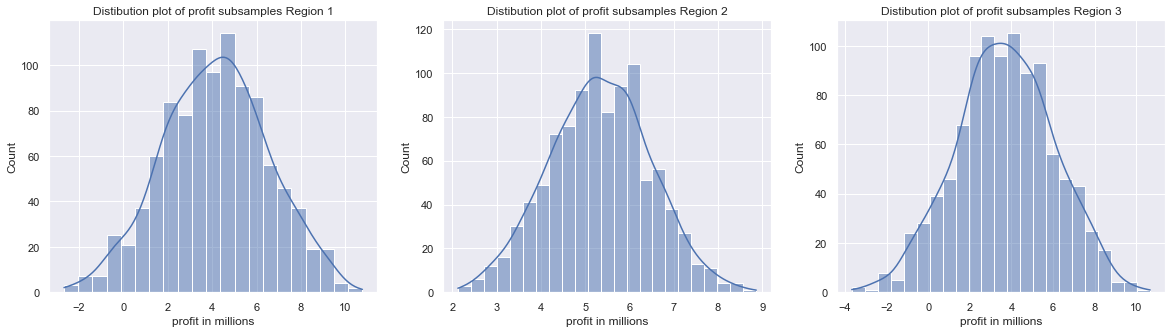

In [73]:
fig, axes= plt.subplots(1, 3, figsize=(20,5))
sns.histplot(data=bootstrap_profit(selected_well_1), kde=True, ax=axes[0])
axes[0].set_title('Distibution plot of profit subsamples Region 1')
axes[0].set(xlabel='profit in millions')


sns.histplot(data=bootstrap_profit(selected_well_2),kde=True, ax=axes[1])
axes[1].set_title('Distibution plot of profit subsamples Region 2')
axes[1].set(xlabel='profit in millions')

sns.histplot(data=bootstrap_profit(selected_well_3), kde=True,ax=axes[2])
axes[2].set_title('Distibution plot of profit subsamples Region 3')
axes[2].set(xlabel='profit in millions')


plt.show()

In [64]:
def profit_dist(selected_well):
    profit_dist=pd.Series(bootstrap_profit(selected_well))
    average_profit= profit_dist.mean()
    lower_bound, upper_bound=confidence_interval = st.t.interval(0.95, len(profit_dist)-1, loc=average_profit, scale=profit_dist.sem())
    return average_profit, lower_bound, upper_bound
    

In [65]:
average_profit1, lower_bound1, upper_bound1=profit_dist(selected_well_1)
average_profit2, lower_bound2, upper_bound2=profit_dist(selected_well_2)
average_profit3, lower_bound3, upper_bound3=profit_dist(selected_well_3)

In [66]:
print(f'The average profit for wells selected in region 1 is {round(average_profit1,2)}million and we profit at a 95% confidence interval is between {round(lower_bound1,2)} and {round(upper_bound1,2)}million\n')

print(f'The average profit for wells selected in region 2 is {round(average_profit2,2)}million and we profit at a 95% confidence interval is between {round(lower_bound2,2)} and {round(upper_bound2,2)}million\n')

print(f'The average profit for wells selected in region 3 is {round(average_profit3,2)}million and we profit at a 95% confidence interval is between {round(lower_bound3,2)} and {round(upper_bound3,2)}million')

The average profit for wells selected in region 1 is 4.25million and we profit at a 95% confidence interval is between 4.1 and 4.39million

The average profit for wells selected in region 2 is 5.33million and we profit at a 95% confidence interval is between 5.25 and 5.4million

The average profit for wells selected in region 3 is 3.44million and we profit at a 95% confidence interval is between 3.29 and 3.59million


In [67]:
def loss_probability(selected_well):
    profit_dist=pd.Series(bootstrap_profit(selected_well))
    loss_wells= profit_dist[profit_dist<0]
    risk= len(loss_wells)*100/len(profit_dist)
    return risk

In [68]:
loss_probability(selected_well_1)

5.2

In [69]:
loss_probability(selected_well_2)

0.0

In [70]:
loss_probability(selected_well_3)

7.1

We observe that region 2 has the highest average profit. It also has no probability of loss from the risk evaluation. This is also supported by the profit distribution plot shown above as the x range has no negative value. 

## Conclusion


#### Data Prep

it was observed that the data does not have any missing values. We noted that each region contains 100000 rows and 3 features.We observe significant correlation between f2 and the product reserve in all regions.
Region column was included as a categorical feature to keep information about the the region each well came from. The data was split into train and test dataset for each region.

#### Model training

The train data set for region was concatened to train the model on a more robust dataset. The linear regresion model was trained on the combines dataset and model performance on the RMSE was done through cross validation. This gave us an RMSE validation score of 38.

The model beta coefficent shows that the f2 feature has a high level of impact and importance on the product reserve. This confirms the trend seen during our data check where the f2 score had significant correlation to the product reserve.

The beta coefficent also shows that the regions of the well is an important feature in predicting product reserve.

#### Well / Region Selection

For an capital cost of 100 million to break even the total reserve from the 200 selected oil wells must be at least 22223 thousand barrels. An average reserve should be 112 thousand barrels per well.

From the study of 500 well per region the model was used to select 200 wells with the highest reserve in each region. 
Profit was then calculated based on the selected wells from the region. The Region 2 has the highest total reserve for the selcted 200 well, about 23404.27 thousand barrels. It also has the highest average profit of 5.36 million dollar. 

The selected well sample were sample 1000 time using bootstrapping technique to get a distribution of the average profit in each reach. Similar to earlier observation Region 2 had the highest mean of mean profit and a 95% profit confidence interval between 5.28 and 5.43million.

The selected wells in region 2 also have the no risk of loss. The risk of loss in region 1 and 3 were about 5.2 and 7.1 percent respectively. 


#### Recommendation

Based on the result of this study,  OilyGiant mining company should focus more oil wells' development activities in Region 2. This is because Region 2 generated the highest average profit than other regions and has the lowest risk of loss.




